Found 7066 images belonging to 7 classes.


c:\Users\marty\anaconda3\envs\tf311_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 774ms/step
Accuracy: 0.3498


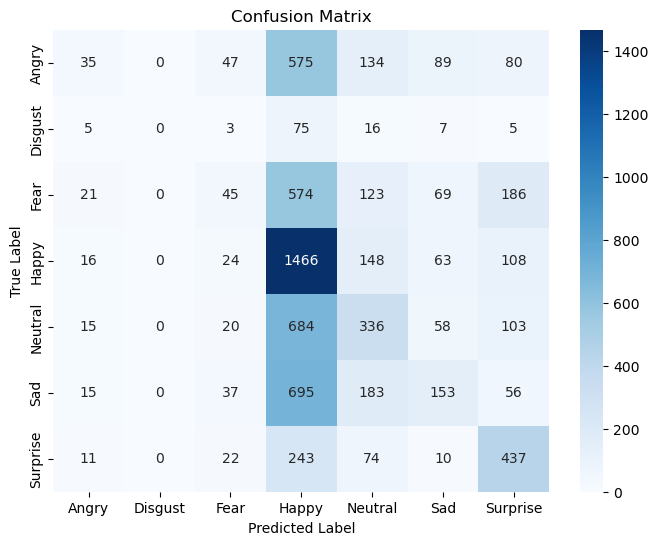

              precision    recall  f1-score   support

       Angry       0.30      0.04      0.06       960
     Disgust       0.00      0.00      0.00       111
        Fear       0.23      0.04      0.07      1018
       Happy       0.34      0.80      0.48      1825
     Neutral       0.33      0.28      0.30      1216
         Sad       0.34      0.13      0.19      1139
    Surprise       0.45      0.55      0.49       797

    accuracy                           0.35      7066
   macro avg       0.28      0.26      0.23      7066
weighted avg       0.32      0.35      0.28      7066



In [4]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Configuration
model_filename = 'emotion_model_v6.keras'
folder_path = 'data/images/'
picture_size = 48
batch_size = 128
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Create validation data generator
datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation/",
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load model
model = load_model(model_filename)

# Get predictions on entire validation set
validation_set.reset()
predictions = model.predict(validation_set, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = validation_set.classes

# Accuracy
print(f"Accuracy: {np.mean(predicted_classes == true_classes):.4f}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=range(7))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(true_classes, predicted_classes,
                           target_names=class_labels,
                           labels=list(range(7)),
                           zero_division=0))

In [6]:
# Create test generator from separate test folder
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    folder_path + 'validation/',  # Separate test folder
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 7066 images belonging to 7 classes.


c:\Users\marty\anaconda3\envs\tf311_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 239ms/step - accuracy: 0.3498 - loss: 1.6280
Test Accuracy: 0.3498


In [7]:
# Identify which emotions the model struggles with
for i, emotion in enumerate(class_labels):
    class_mask = true_classes == i
    class_acc = np.mean(predicted_classes[class_mask] == true_classes[class_mask])
    print(f"{emotion}: {class_acc:.2%} ({np.sum(class_mask)} samples)")

Angry: 3.65% (960 samples)
Disgust: 0.00% (111 samples)
Fear: 4.42% (1018 samples)
Happy: 80.33% (1825 samples)
Neutral: 27.63% (1216 samples)
Sad: 13.43% (1139 samples)
Surprise: 54.83% (797 samples)


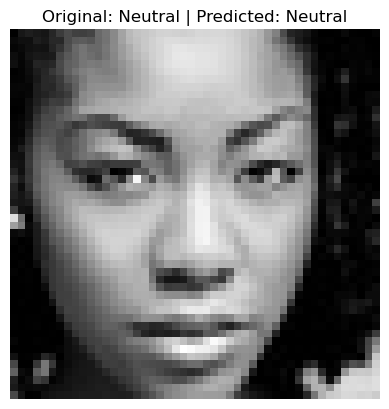

In [16]:
import random

# Randomly select an image index from validation set
n = random.randint(0, len(true_classes) - 1)

# Get the image from validation set
# Find which batch contains image n
batch_idx = n // batch_size
img_idx = n % batch_size

# Get that specific batch
validation_set.reset()
for i in range(batch_idx + 1):
    batch_images, batch_labels = validation_set[i]

# Extract the specific image
image = batch_images[img_idx]
orig_labl = class_labels[true_classes[n]]
pred_labl = class_labels[predicted_classes[n]]

# Display
plt.imshow(image[:,:,0], cmap='gray')
plt.title(f"Original: {orig_labl} | Predicted: {pred_labl}")
plt.axis('off')
plt.show()